# Top quark analyse

In [ ]:
import sys
#!{sys.executable} -m pip install --upgrade --user pip
!{sys.executable} -m pip install uproot3 pandas numpy matplotlib

In [1]:
import uproot3 # for reading .root files
import pandas as pd # to store data as dataframe
import time # to measure time to analyse
import math # for mathematical functions such as square root
import numpy as np # for numerical calculations such as histogramming
from itertools import combinations 
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import AutoMinorLocator # for minor ticks

BIGGER_SIZE = 16
plt.rc('font', size=BIGGER_SIZE)
plt.rcParams['figure.figsize'] = [12,8]
#plt.style.use('default')

import infofile # local file containing cross-sections, sums of weights, dataset IDs

In [46]:
#lumi = 0.5 # fb-1 # data_A only
#lumi = 1.9 # fb-1 # data_B only
#lumi = 2.9 # fb-1 # data_C only
#lumi = 4.7 # fb-1 # data_D only
lumi = 10 # fb-1 # data_A,data_B,data_C,data_D

fraction = 0.01 # reduce this is you want the code to run quicker
#fraction = 0.1 # reduce this is you want the code to run quicker
                                                                                                                                  
#tuple_path = r'C:\Users\jacob\Desktop\1lep/' # local
tuple_path = '../data/'
#tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/" # web address

MV2c10_cut = 0.8244
GeV_cut = 30*1000
ALL = slice(None) # trick til at give en query der giver alle rækker
W_boson = 80.385

In [4]:
samples = {

    'data': {
        'list' : ['data_A','data_B','data_C','data_D'],
    },

    r'V+jets' : { # V+jets
        'list' : [

# ls | grep "36110[6-8]" | grep Z
'Zee'
,'Zmumu'
,'Ztautau'

# ls | grep "36110[0-5]" | grep W
,'Wplusenu'
,'Wplusmunu'
,'Wplustaunu'
,'Wminusenu'
,'Wminusmunu'
,'Wminustaunu'

# ls | grep "3641[0-9][0-9]" | grep W      
,'Wmunu_PTV0_70_CVetoBVeto'
,'Wmunu_PTV0_70_CFilterBVeto'
,'Wmunu_PTV0_70_BFilter'
,'Wmunu_PTV70_140_CVetoBVeto'
,'Wmunu_PTV70_140_CFilterBVeto'
,'Wmunu_PTV70_140_BFilter'
,'Wmunu_PTV140_280_CVetoBVeto'
,'Wmunu_PTV140_280_CFilterBVeto'
,'Wmunu_PTV140_280_BFilter'
,'Wmunu_PTV280_500_CVetoBVeto'
,'Wmunu_PTV280_500_CFilterBVeto'
,'Wmunu_PTV280_500_BFilter'
,'Wmunu_PTV500_1000'
,'Wmunu_PTV1000_E_CMS'
,'Wenu_PTV0_70_CVetoBVeto'
,'Wenu_PTV0_70_CFilterBVeto'
,'Wenu_PTV0_70_BFilter'
,'Wenu_PTV70_140_CVetoBVeto'
,'Wenu_PTV70_140_CFilterBVeto'
,'Wenu_PTV70_140_BFilter'
,'Wenu_PTV140_280_CVetoBVeto'
,'Wenu_PTV140_280_CFilterBVeto'
,'Wenu_PTV140_280_BFilter'
,'Wenu_PTV280_500_CVetoBVeto'
,'Wenu_PTV280_500_CFilterBVeto'
,'Wenu_PTV280_500_BFilter'
,'Wenu_PTV500_1000'
,'Wenu_PTV1000_E_CMS'
,'Wtaunu_PTV0_70_CVetoBVeto'
,'Wtaunu_PTV0_70_CFilterBVeto'
,'Wtaunu_PTV0_70_BFilter'
,'Wtaunu_PTV70_140_CVetoBVeto'
,'Wtaunu_PTV70_140_CFilterBVeto'
,'Wtaunu_PTV70_140_BFilter'
,'Wtaunu_PTV140_280_CVetoBVeto'
,'Wtaunu_PTV140_280_CFilterBVeto'
,'Wtaunu_PTV140_280_BFilter'
,'Wtaunu_PTV280_500_CVetoBVeto'
,'Wtaunu_PTV280_500_CFilterBVeto'
,'Wtaunu_PTV280_500_BFilter'
,'Wtaunu_PTV500_1000'
,'Wtaunu_PTV1000_E_CMS'

# ls | grep "3641[0-9][0-9]" | grep Z
,'Zmumu_PTV0_70_CVetoBVeto'
,'Zmumu_PTV0_70_CFilterBVeto'
,'Zmumu_PTV0_70_BFilter'
,'Zmumu_PTV70_140_CVetoBVeto'
,'Zmumu_PTV70_140_CFilterBVeto'
,'Zmumu_PTV70_140_BFilter'
,'Zmumu_PTV140_280_CVetoBVeto'
,'Zmumu_PTV140_280_CFilterBVeto'
,'Zmumu_PTV140_280_BFilter'
,'Zmumu_PTV280_500_CVetoBVeto'
,'Zmumu_PTV280_500_CFilterBVeto'
,'Zmumu_PTV280_500_BFilter'
,'Zmumu_PTV500_1000'
,'Zmumu_PTV1000_E_CMS'
,'Zee_PTV0_70_CVetoBVeto'
,'Zee_PTV0_70_CFilterBVeto'
,'Zee_PTV0_70_BFilter'
,'Zee_PTV70_140_CVetoBVeto'
,'Zee_PTV70_140_CFilterBVeto'
,'Zee_PTV70_140_BFilter'
,'Zee_PTV140_280_CVetoBVeto'
,'Zee_PTV140_280_CFilterBVeto'
,'Zee_PTV140_280_BFilter'
,'Zee_PTV280_500_CVetoBVeto'
,'Zee_PTV280_500_CFilterBVeto'
,'Zee_PTV280_500_BFilter'
,'Zee_PTV500_1000'
,'Zee_PTV1000_E_CMS'
,'Ztautau_PTV0_70_CVetoBVeto'
,'Ztautau_PTV0_70_CFilterBVeto'
,'Ztautau_PTV0_70_BFilter'
,'Ztautau_PTV70_140_CVetoBVeto'
,'Ztautau_PTV70_140_CFilterBVeto'
,'Ztautau_PTV70_140_BFilter'
,'Ztautau_PTV140_280_CVetoBVeto'
,'Ztautau_PTV140_280_CFilterBVeto'
,'Ztautau_PTV140_280_BFilter'
,'Ztautau_PTV280_500_CVetoBVeto'
,'Ztautau_PTV280_500_CFilterBVeto'
,'Ztautau_PTV280_500_BFilter'
,'Ztautau_PTV500_1000'
,'Ztautau_PTV1000_E_CMS'
        ],
        'color' : "#ff0000" # red
    },

    r'Single top' : { # Single top
        'list' : [
# ls | grep "410011\|410012\|410013\|410014\|410025\|410026"
'single_top_tchan'
,'single_antitop_tchan'
,'single_top_wtchan'
,'single_antitop_wtchan'
,'single_top_schan'
,'single_antitop_schan'
        ],
        'color' : "#00cdff" # light blue
    },
    
    r'Diboson' : { # Diboson
        # ls | grep "363359\|363360\|363492\|363356\|363490\|363358\|363489\|363491\|363493"
        'list' : ['ZqqZll','WqqZll','WpqqWmlv','WplvWmqq','WlvZqq','llll','lllv','llvv','lvvv'],
        'color' : "#00ff32" # green
    },

    r'$t\bar{t}$' : { # ttbar
        'list' : ['ttbar_lep'],
        'color' : "#6b59d3" # purple
    },
}



In [5]:
def get_data_from_files():
    data = {} # define empty dictionary to hold dataframes
    for s in samples: # loop over samples
        print('Processing '+s+' samples') # print which sample
        frames = [] # define empty list to hold data
        for val in samples[s]['list']: # loop over each file
            if s == 'data': prefix = "Data/" # Data prefix
            else: # MC prefix
                prefix = "MC/mc_"+str(infofile.infos[val]["DSID"])+"."
            fileString = tuple_path+prefix+val+".1lep.root" # file name to open
            temp = read_file(fileString,val) # call the function read_file defined below
            frames.append(temp) # append dataframe returned from read_file to list of dataframes
        data[s] = pd.concat(frames) # dictionary entry is concatenated dataframes
    
    return data # return dictionary of dataframes

In [6]:
def calc_weight(xsec_weight, mcWeight, scaleFactor_PILEUP,
                scaleFactor_ELE, scaleFactor_MUON, 
                scaleFactor_LepTRIGGER ):
    return xsec_weight*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER

In [7]:
def get_xsec_weight(sample):
    info = infofile.infos[sample] # open infofile
    xsec_weight = (lumi*1000*info["xsec"])/(info["sumw"]*info["red_eff"]) #*1000 to go from fb-1 to pb-1
    return xsec_weight # return cross-section weight

In [8]:
def calc_mjjj(jet_pt,jet_eta,jet_phi,jet_E):
    px_0 = jet_pt[0]*math.cos(jet_phi[0]) # x-component of lep[0] momentum
    py_0 = jet_pt[0]*math.sin(jet_phi[0]) # y-component of lep[0] momentum
    pz_0 = jet_pt[0]*math.sinh(jet_eta[0]) # z-component of lep[0] momentum
    px_1 = jet_pt[1]*math.cos(jet_phi[1]) # x-component of lep[1] momentum
    py_1 = jet_pt[1]*math.sin(jet_phi[1]) # y-component of lep[1] momentum
    pz_1 = jet_pt[1]*math.sinh(jet_eta[1]) # z-component of lep[1] momentum
    px_2 = jet_pt[2]*math.cos(jet_phi[2]) # x-component of lep[2] momentum
    py_2 = jet_pt[2]*math.sin(jet_phi[2]) # y-component of lep[2] momentum
    pz_2 = jet_pt[2]*math.sinh(jet_eta[2]) # z-component of lep[3] momentum
    sumpx = px_0 + px_1 + px_2 # x-component of 4-jets
    sumpy = py_0 + py_1 + py_2 # y-component of 4 jets
    sumpz = pz_0 + pz_1 + pz_2 # z-component of 4 jets
    sumE = jet_E[0] + jet_E[1] + jet_E[2] # energy of 4 jets
    jjj_pt = (px_0+px_1+px_2)**2+(py_0+py_1+py_2)**2
    jjj_m = math.sqrt(sumE**2 - sumpx**2 - sumpy**2 - sumpz**2)/1000 #/1000 to go from MeV to GeV
    return jjj_pt, jjj_m

def calc_mjj(jet_pt,jet_eta,jet_phi,jet_E):
    px_0 = jet_pt[0]*math.cos(jet_phi[0]) # x-component of lep[0] momentum
    py_0 = jet_pt[0]*math.sin(jet_phi[0]) # y-component of lep[0] momentum
    pz_0 = jet_pt[0]*math.sinh(jet_eta[0]) # z-component of lep[0] momentum
    px_1 = jet_pt[1]*math.cos(jet_phi[1]) # x-component of lep[1] momentum
    py_1 = jet_pt[1]*math.sin(jet_phi[1]) # y-component of lep[1] momentum
    pz_1 = jet_pt[1]*math.sinh(jet_eta[1]) # z-component of lep[1] momentum
    sumpx = px_0 + px_1# x-component of 2 jets
    sumpy = py_0 + py_1# y-component of 2 jets
    sumpz = pz_0 + pz_1# z-component of 2 jets
    sumE = jet_E[0] + jet_E[1]# energy of 2 jets
    jj_m = math.sqrt(sumE**2 - sumpx**2 - sumpy**2 - sumpz**2)/1000 #/1000 to go from MeV to GeV
    return jj_m

In [98]:
#tjekker om der kun er én b-tagget i en kombination
def en_btag_tjek(data):
    filtered = list(filter(lambda d: d[0] > MV2c10_cut, data))
    return len(filtered) == 1

def to_ikke_btag_tjek(data):
    filtered = list(filter(lambda d: d[0] > MV2c10_cut, data))
    return len(filtered) == 0

def mjjj_bedste(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E):
    try:
        samlet = zip(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E)
        comb = combinations(samlet, 3) # laver alle kombinationer
        en_btagget_comb = list(filter(en_btag_tjek, comb)) # laver liste med rigtige komb. liste med tre tupler
        liste_pt_m = []
        for jets in en_btagget_comb:
            z = list(zip(*jets))  # laver fem lister med tre værdier i hver liste
            pt, m = calc_mjjj(z[1],z[2],z[3],z[4])
            liste_pt_m.append((pt,m))
        liste_pt, liste_m = list(zip(*liste_pt_m))
        bedste = np.argmax(liste_pt) # hvilket index i listen har højest værdi    
        mjjj = liste_m[bedste]
        mW_zipped = list(zip(*[j for j in en_btagget_comb[bedste] if j[0] <= MV2c10_cut]))
        mW = calc_mjj(mW_zipped[1],mW_zipped[2],mW_zipped[3],mW_zipped[4])
        return mjjj, mW # slår op og får værdien
    except ValueError:
        return 0,0

def W_m(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E):
    print('W_m')
    try:
        samlet = zip(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E)
        samlet2 = zip(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E)
        print('list(samlet2): ', list(samlet2))
        comb = combinations(samlet, 2) # laver alle kombinationer
        to_btagget_comb = list(filter(to_ikke_btag_tjek, comb)) # laver liste med rigtige komb. liste med tre tupler
        print('to_btagget_comb: ', to_btagget_comb)
        liste_m = []
        for jets in to_btagget_comb:
            z = list(zip(*jets))  # laver fem lister med tre værdier i hver liste
            m = calc_mjj(z[1],z[2],z[3],z[4])
            liste_m.append(m)
        m_diff = [abs(i-W_boson) for i in liste_m]
        bedste = np.argmin(m_diff) # hvilket index i listen har højest værdi
        print('to_btagget_comb[bedste]: ', to_btagget_comb[bedste])
        mjj = liste_m[bedste]
        
        #[calc_mjjj(mjj + i) for i in zip(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E) if i[0] > MV2c10_cut]
        #adsf = [i for i in len(jet_MV2c10) if jet_MV2c10[i] > MV2c10_cut]
        print([calc_mjj(jet_pt[i],jet_eta[i],jet_phi[i],jet_E[i]) for i,v in enumerate(jet_MV2c10) if v > MV2c10_cut])
        
        # calc_mjjj(jet_pt,jet_eta,jet_phi,jet_E)
        
        #print([i for i in len(jet_MV2c10) if jet_MV2c10[i] > MV2c10_cut])
        
        # mjj[0], mjj[1]
        
        return mjj
    except ValueError:
        return 0

In [14]:
def cut_lep_pt(lep_pt):
    return lep_pt < GeV_cut

def cut_jet_n(jet_n):
    return jet_n < 4

def jet_pt_30GeV(jet_pt):
    # the jet pt is sorted by largest
    return jet_pt[3] > GeV_cut

def jet_pt_sum(jet_pt):
    return sum(jet_pt)

def b_tag_70(jet_MV2c10):
    return len([num for num in jet_MV2c10 if num > MV2c10_cut]) > 1

def MT_W(lep_pt, lep_phi, met_et, met_phi):
    return np.sqrt(2*lep_pt*met_et*(1-np.cos(lep_phi-met_phi)))

Cuts som kræver 1 lep
Samt 4 jets hvor 2 af jets har 70% sikkerhed

find invariant masse for 3 jets sammnenlagt. (der er 2 forskellige sammensætninger grundet 2 b jets.) 

In [50]:
def read_file(path,sample):
    start = time.time() # start the clock
    print("\tProcessing: "+sample) # print which sample is being processed
    data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
    tree = uproot3.open(path)["mini"] # open the tree called mini
    numevents = uproot3.numentries(path, "mini") # number of events
    
    # variables to calculate Monte Carlo weight
    if 'data' not in sample: xsec_weight = get_xsec_weight(sample) # get cross-section weight

    root_variables = ['lep_pt','lep_phi'
                  ,'met_et','met_phi'
                  ,'jet_n','jet_pt','jet_eta','jet_phi','jet_E','jet_MV2c10'
                  ,'mcWeight','scaleFactor_PILEUP','scaleFactor_ELE','scaleFactor_MUON','scaleFactor_LepTRIGGER']
    
    for data in tree.iterate(root_variables, outputtype=pd.DataFrame, entrystop=numevents*fraction):    
        nIn = len(data.index) # number of events in this batch

        if 'data' not in sample: # only do this for Monte Carlo simulation files
            # multiply all Monte Carlo weights and scale factors together to give total weight
            data['totalWeight'] = np.vectorize(calc_weight)(xsec_weight,
                                                            data.mcWeight,
                                                            data.scaleFactor_PILEUP,
                                                            data.scaleFactor_ELE,
                                                            data.scaleFactor_MUON,
                                                            data.scaleFactor_LepTRIGGER)
    
        # cut jet number
        fail = data[ np.vectorize(cut_jet_n)(data.jet_n) ].index
        data.drop(fail, inplace=True)
        
        # b-tag
        data['jet_pt_30GeV'] = np.vectorize(jet_pt_30GeV)(data.jet_pt)

        # cut lep pt
        fail = data[ np.vectorize(cut_lep_pt)(data.lep_pt) ].index
        data.drop(fail, inplace=True)
        
        # b-tag
        data['b_tag'] = np.vectorize(b_tag_70)(data.jet_MV2c10)
    
        # Invariant mass
        _, data['mjjj'] = np.vectorize(calc_mjjj)(data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)

        data['mjjj_bedste'], data['mW_kand'] = np.vectorize(mjjj_bedste)(data.jet_MV2c10,data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)
        
        data['mjj_comb_W'] = np.vectorize(W_m)(data.jet_MV2c10,data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)
        
        data['jet_pt_sum'] = np.vectorize(jet_pt_sum)(data.jet_pt)
        
        #
        data['MT_W'] = np.vectorize(MT_W)(data.lep_pt, data.lep_phi, data.met_et, data.met_phi)

        nOut = len(data.index) # number of events passing cuts in this batch
        data_all = data_all.append(data) # append dataframe from this batch to the dataframe for the whole sample
        elapsed = time.time() - start # time taken to process
        print("\t\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s") # events before and after
      
    return data_all # return dataframe containing events passing all cuts

In [66]:
start = time.time() # time at start of whole processing
data = get_data_from_files() # process all files
elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Processing data samples
	Processing: data_A
		 nIn: 97964,	 nOut: 	1828	 in 4.0s
	Processing: data_B
		 nIn: 175460,	 nOut: 	3406	 in 7.4s
		 nIn: 173301,	 nOut: 	3327	 in 12.8s
	Processing: data_C
		 nIn: 175520,	 nOut: 	3595	 in 8.1s
		 nIn: 175520,	 nOut: 	3553	 in 13.6s
		 nIn: 159586,	 nOut: 	3217	 in 18.8s
	Processing: data_D
		 nIn: 175582,	 nOut: 	4336	 in 8.0s
		 nIn: 175582,	 nOut: 	3841	 in 13.8s
		 nIn: 175582,	 nOut: 	3594	 in 19.7s
		 nIn: 175582,	 nOut: 	3593	 in 25.4s
		 nIn: 25650,	 nOut: 	514	 in 26.9s
Processing V+jets samples
	Processing: Zee
		 nIn: 164429,	 nOut: 	1852	 in 5.2s
	Processing: Zmumu
		 nIn: 128170,	 nOut: 	1009	 in 5.8s
	Processing: Ztautau
		 nIn: 9869,	 nOut: 	197	 in 2.5s
	Processing: Wplusenu
		 nIn: 126342,	 nOut: 	521	 in 4.7s
	Processing: Wplusmunu
		 nIn: 133968,	 nOut: 	457	 in 5.2s
	Processing: Wplustaunu
		 nIn: 5509,	 nOut: 	40	 in 1.8s
	Processing: Wminusenu
		 nIn: 93956,	 nOut: 	378	 in 4.6s
	Processing: Wminusmunu
		 nIn: 110802,	 nOu

In [99]:
#d1 = tuple_path+'Data/data_A.1lep.root'\n",
#d1 = tuple_path+'MC/mc_364184.Wtaunu_PTV0_70_CVetoBVeto.1lep.root'
d1 = tuple_path+'Data/data_A.1lep.root'
dtest = read_file(d1, r'data')
print('done')

	Processing: data
W_m
list(samlet2):  [(-0.39944443, 118696.42, 0.14715476, 3.062986, 120380.95), (-0.7963451, 60372.133, 0.45665833, -2.3069797, 67369.62), (-0.8765587, 31864.127, -1.7943488, 2.15417, 98638.37), (-0.5716057, 27943.557, -0.15726602, -2.3827689, 28928.11), (0.9732116, 22727.184, 0.453061, -0.9858858, 25435.63), (0.8555263, 22236.031, -0.8332631, -0.60838914, 30678.754)]
to_btagget_comb:  [((-0.39944443, 118696.42, 0.14715476, 3.062986, 120380.95), (-0.7963451, 60372.133, 0.45665833, -2.3069797, 67369.62)), ((-0.39944443, 118696.42, 0.14715476, 3.062986, 120380.95), (-0.8765587, 31864.127, -1.7943488, 2.15417, 98638.37)), ((-0.39944443, 118696.42, 0.14715476, 3.062986, 120380.95), (-0.5716057, 27943.557, -0.15726602, -2.3827689, 28928.11)), ((-0.7963451, 60372.133, 0.45665833, -2.3069797, 67369.62), (-0.8765587, 31864.127, -1.7943488, 2.15417, 98638.37)), ((-0.7963451, 60372.133, 0.45665833, -2.3069797, 67369.62), (-0.5716057, 27943.557, -0.15726602, -2.3827689, 28928.11

IndexError: invalid index to scalar variable.

In [70]:
dtest['jet_phi']

entry
103      [3.062986, -2.3069797, 2.15417, -2.3827689, -0...
137      [0.72087777, -2.2173972, -2.9363217, 1.7634941...
245        [1.6619253, -1.1125637, 1.0509864, -0.68988633]
274       [-2.2333255, -2.753675, 0.06673221, -0.80602634]
304         [2.8777747, 2.5501995, 0.045767356, 0.8746324]
                               ...                        
97852        [2.9385722, 2.1738582, -2.6832116, -2.861757]
97905    [1.1575289, -2.8671796, -0.9392489, -1.9099176...
97924    [0.25062567, -0.49713036, -3.0540562, 0.107529...
97933    [-1.1598591, 2.470687, 0.7331583, 2.0935993, -...
97947       [2.5551229, -0.6622594, -1.0055056, 1.1688609]
Name: jet_phi, Length: 1828, dtype: object

In [37]:
data['data']['jet_pt_sum'].max()

2848630.5703125

In [20]:
def plot_data_query(data, query, column, p_xmin = 100, p_xmax = 240, p_step_size = 5, p_xlabel = 'x'):

    xmin = p_xmin # GeV
    xmax = p_xmax # GeV
    step_size = p_step_size # GeV

    bin_edges = np.arange(start=xmin, # The interval includes this value
                     stop=xmax+step_size, # The interval doesn't include this value
                     step=step_size ) # Spacing between values
    bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                            stop=xmax+step_size/2, # The interval doesn't include this value
                            step=step_size ) # Spacing between values

    data_x,_ = np.histogram(data['data'].query(query)[column], 
                            bins=bin_edges ) # histogram the data
    data_x_errors = np.sqrt( data_x ) # statistical error on the data

    signal_x = data[r'$t\bar{t}$'].query(query)[column] # histogram the signal
    signal_weights = data[r'$t\bar{t}$'].query(query).totalWeight # get the weights of the signal events
    signal_color = samples[r'$t\bar{t}$']['color'] # get the colour for the signal bar

    mc_x = [] # define list to hold the Monte Carlo histogram entries
    mc_weights = [] # define list to hold the Monte Carlo weights
    mc_colors = [] # define list to hold the colors of the Monte Carlo bars
    mc_labels = [] # define list to hold the legend labels of the Monte Carlo bars

    for s in samples: # loop over samples
        if s not in ['data', r'$t\bar{t}$']: # if not data nor signal
            mc_x.append( data[s].query(query)[column] ) # append to the list of Monte Carlo histogram entries
            mc_weights.append( data[s].query(query).totalWeight ) # append to the list of Monte Carlo weights
            mc_colors.append( samples[s]['color'] ) # append to the list of Monte Carlo bar colors
            mc_labels.append( s ) # append to the list of Monte Carlo legend labels

    # *************
    # Main plot 
    # *************
    main_axes = plt.gca() # get current axes
    
    # plot the data points
    main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                       fmt='ko', # 'k' means black and 'o' is for circles 
                       label='Data') 
    
    # plot the Monte Carlo bars
    mc_heights = main_axes.hist(mc_x, bins=bin_edges, 
                                weights=mc_weights, stacked=True, 
                                color=mc_colors, label=mc_labels )
    
    mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value
        
    # plot the signal bar
    mc_signal = main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, 
                   weights=signal_weights, color=signal_color,
                   label=r'$t\bar{t}$')

    mc_x_err = np.sqrt( mc_x_tot+mc_signal[0] ) # statistical error on the MC bars
    
    # plot the statistical uncertainty
    main_axes.bar(bin_centres, # x
                  2*mc_x_err, # heights
                  alpha=0.5, # half transparency
                  bottom=mc_x_tot+mc_signal[0]-mc_x_err, color='none',
                  hatch="////", width=step_size, label='Stat. Unc.' )

    # set the x-limit of the main axes
    main_axes.set_xlim( left=xmin, right=xmax ) 
    
    # separation of x axis minor ticks
    main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 
    
    # set the axis tick parameters for the main axes
    main_axes.tick_params(which='both', # ticks on both x and y axes
                          direction='in', # Put ticks inside and outside the axes
                          top=True, # draw ticks on the top axis
                          right=True ) # draw ticks on right axis
    
    # x-axis label
    main_axes.set_xlabel(r'4-lepton invariant mass $\mathrm{m_{4l}}$ [GeV]',
                        fontsize=13, x=1, horizontalalignment='right')
    
    # write y-axis label for main axes
    main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                         y=1, horizontalalignment='right') 
    
    # set y-axis limits for main axes
    main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )
    
    # add minor ticks on y-axis for main axes
    main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

    # Add text 'ATLAS Open Data' on plot
    plt.text(0.05, # x
             0.93, # y
             'ATLAS Open Data', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=13 ) 
    
    # Add text 'for education' on plot
    plt.text(0.05, # x
             0.88, # y
             'for education', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             style='italic',
             fontsize=8 ) 
    
    # Add energy and luminosity
    lumi_used = str(lumi*fraction) # luminosity to write on the plot
    plt.text(0.05, # x
             0.82, # y
             '$\sqrt{s}$=13 TeV,$\int$L dt = '+lumi_used+' fb$^{-1}$', # text
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes
    
    # Add a label for the analysis carried out
    plt.text(0.05, # x
             0.76, # y
             r't $H \rightarrow ZZ^* \rightarrow 4\ell$', # text 
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # draw the legend
    main_axes.legend( frameon=False ) # no box around the legend
    
    return

In [59]:
data['data'].loc[data['data']['b-tag'] == True]['mjjj']

entry
103       220.445346
137       243.160283
742       510.182089
759       183.110773
1080      148.196486
             ...    
726698    287.966005
727033    420.563073
727278    318.992922
727797    169.049702
727878    126.894723
Name: mjjj, Length: 4043, dtype: float64

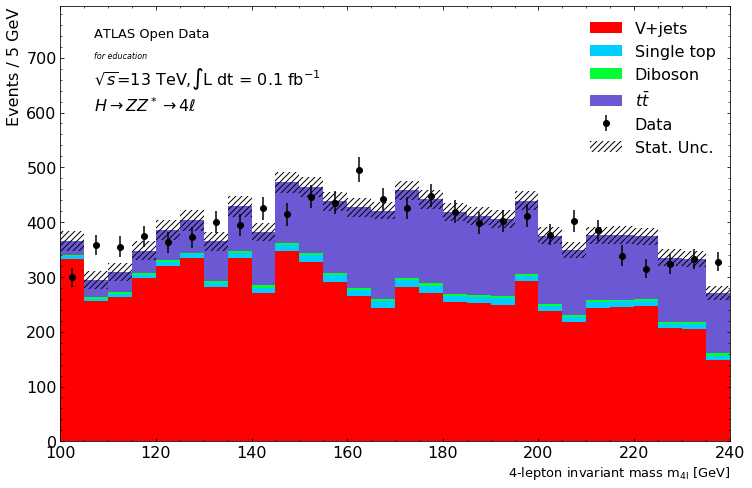

In [137]:
plot_data_query(data, 'met_et > @GeV_cut', 'mjjj')
#plot_data_query(data, '@ALL', 'mjjj')

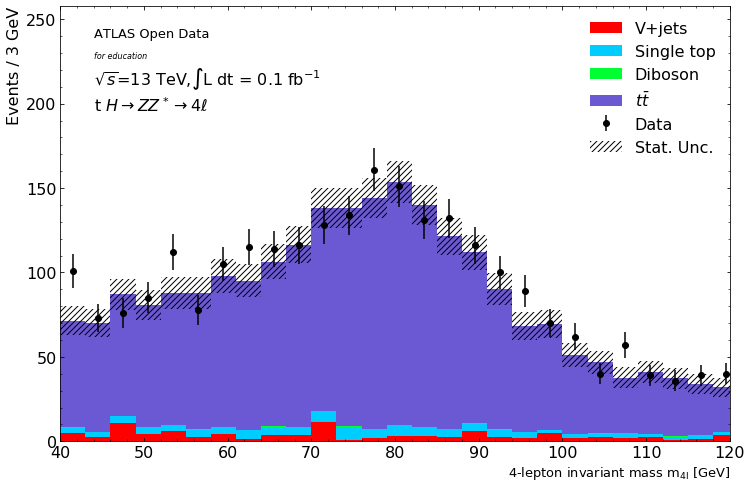

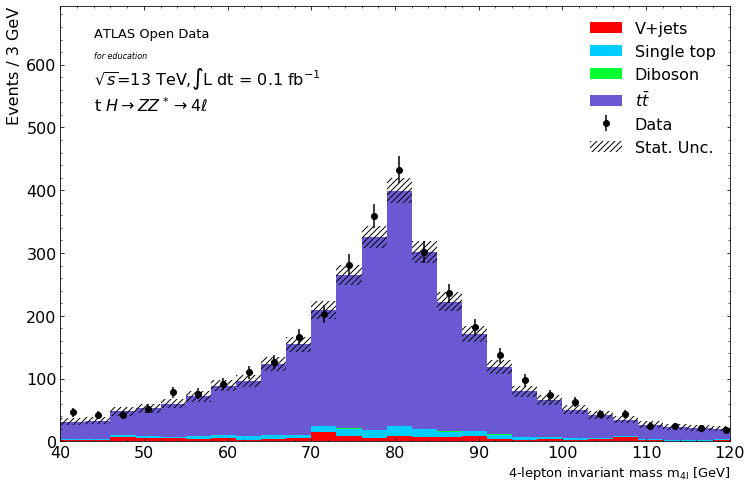

In [69]:
plot_data_query(data, 'b_tag == True', 'mW_kand', p_xmin = 40, p_xmax = 120, p_step_size = 3)
plt.show()
plot_data_query(data, 'b_tag == True', 'mjj_comb_W', p_xmin = 40, p_xmax = 120, p_step_size = 3)

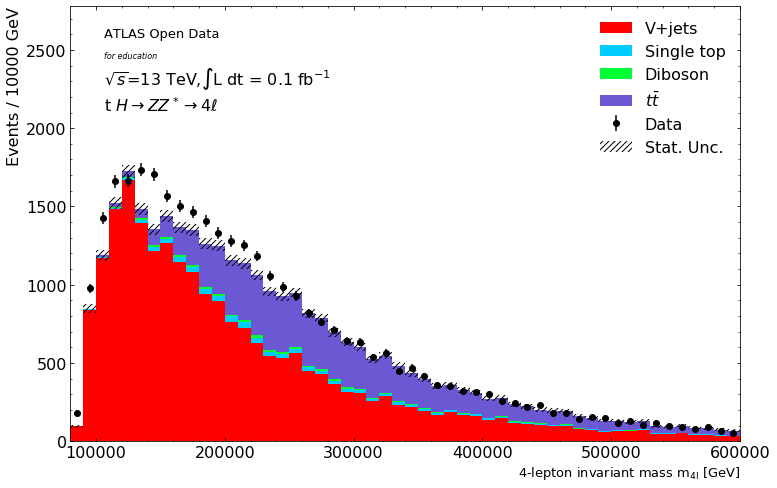

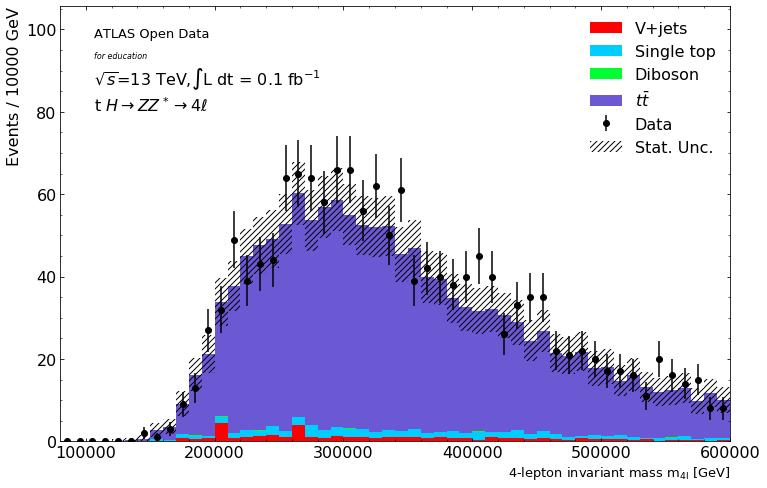

In [43]:
plot_data_query(data, '@ALL', 'jet_pt_sum', p_xmin = 80000, p_xmax = 600000, p_step_size = 10000)
plt.show()
#plot_data_query(data, 'b_tag == True', 'jet_pt_sum', p_xmin = 80000, p_xmax = 600000, p_step_size = 10000)
#plt.show()
plot_data_query(data, 'mjjj_bedste != 0 & b_tag == True & jet_pt_30GeV == True & met_et > @GeV_cut & MT_W > @GeV_cut', 'jet_pt_sum', p_xmin = 80000, p_xmax = 600000, p_step_size = 10000)

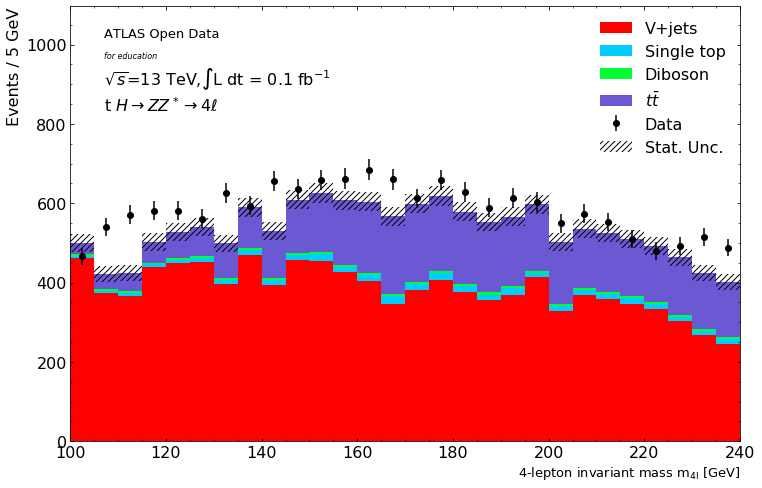

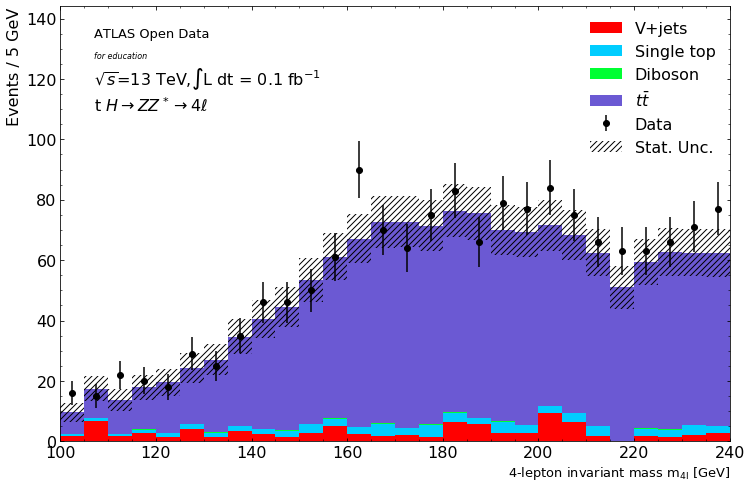

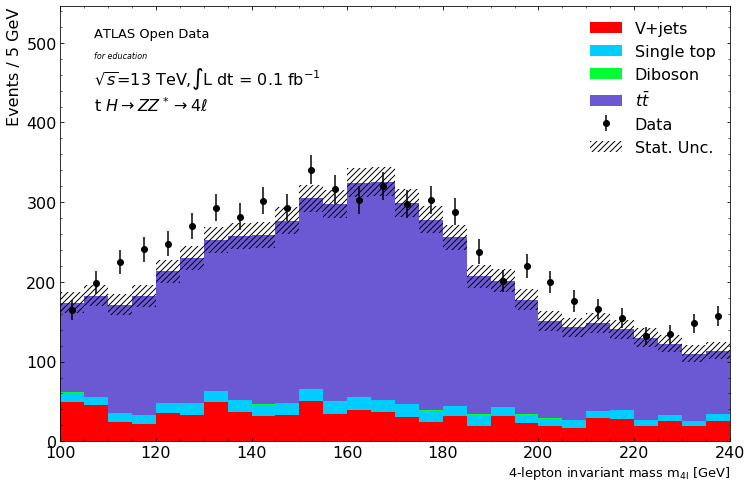

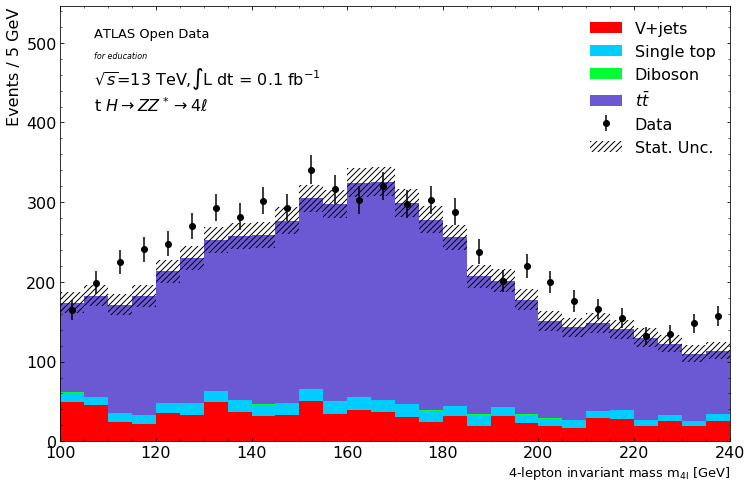

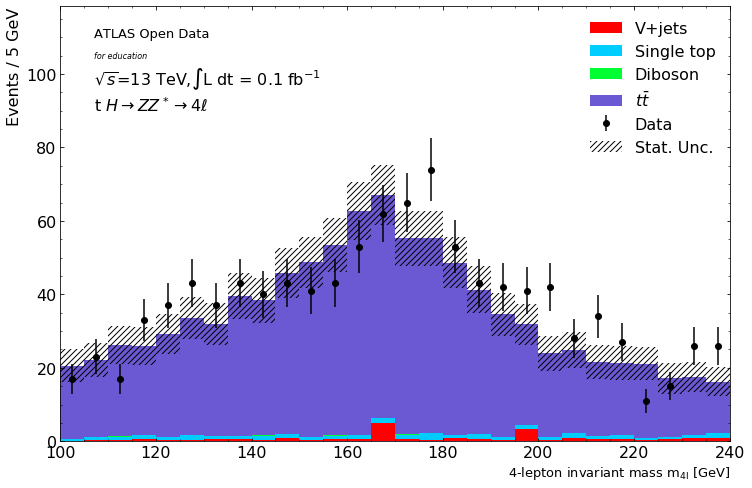

In [21]:
plot_data_query(data, '@ALL', 'mjjj')
plt.savefig('p1.png')
plt.show()
plot_data_query(data, 'b_tag == True', 'mjjj')
plt.savefig('p2.png')
plt.show()
plot_data_query(data, '@ALL', 'mjjj_bedste')
plt.savefig('p3.png')
plt.show()
plot_data_query(data, 'mjjj_bedste != 0', 'mjjj_bedste')
plt.savefig('p4.png')
plt.show()
plot_data_query(data, 'mjjj_bedste != 0 & b_tag == True & jet_pt_30GeV == True & met_et > @GeV_cut & MT_W > @GeV_cut', 'mjjj_bedste')
plt.savefig('p5.png')
plt.show()


# alle jet pt sammenlagt ht
# W massen, massen af de ikke b-taggede jets i den endelige top kandidat